# Image Classification with the MNIST Dataset

## Training and Validation Data and Labels

1. `x_train`: Images used for training the neural network
2. `y_train`: Correct labels for the `x_train` images, used to evaluate the model's predictions during training
3. `x_valid`: Images set aside for validating the performance of the model after it has been trained
4. `y_valid`: Correct labels for the `x_valid` images, used to evaluate the model's predictions after it has been trained


## Loading the Data Into Memory (with Keras)

In [3]:
from tensorflow.keras.datasets import mnist  # loading the Keras dataset module for MNIST:

In [4]:
#With the mnist module, we can easily load the MNIST data, already partitioned into images and labels for both training and validation:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


## Exploring the MNIST Data

This MNIST dataset contains 70,000 grayscale images of handwritten digits. By executing the following cells, we can see that Keras has partitioned 60,000 of these images for training, and 10,000 for validation (after training), and also, that each image itself is a 2D array with the dimensions 28x28:

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_valid.shape

(10000, 28, 28)

Furthermore, we can see that these 28x28 images are represented as a collection of unsigned 8-bit integer values between 0 and 255, the values corresponding with a pixel's grayscale value where `0` is black, `255` is white, and all other values are in between:

In [7]:
x_train.dtype

dtype('uint8')

In [8]:
x_train.min()

0

In [9]:
x_train.max()

255

In [10]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

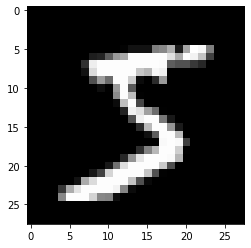

In [11]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

This is a 28x28 pixel image of a either 5 or 3. 
We check it by checking the `y_train` data, which contains correct labels for the data.

In [12]:
y_train[0]

5

## Preparing the Data for Training

In deep learning, data needs to be transformed to be in the ideal state for training. 
For this particular image classification problem, there are 3 tasks we should perform with the data in preparation for training:
1. Flatten the image data, to simplify the image input into the model
2. Normalize the image data, to make the image input values easier to work with for the model
3. Categorize the labels, to make the label values easier to work with for the model

### Flattening the Image Data

Though it's possible for a deep learning model to accept a 2-dimensional image (in our case 28x28 pixels), we're going to simplify things to start and reshape each image into a single array of 784 continuous pixels (note: 28x28 = 784). This is also called flattening the image.


In [13]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

We can confirm that the image data has been reshaped and is now a collection of 1D arrays containing 784 pixel values each:

In [14]:
x_train.shape

(60000, 784)

In [15]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizing the Image Data

Deep learning models are better at dealing with floating point numbers between 0 and 1. Converting integer values to floating point values between 0 and 1 is called normalization, and a simple approach we will take here to normalize the data will be to divide all the pixel values (which if you recall are between 0 and 255) by 255:

In [16]:
x_train = x_train / 255
x_valid = x_valid / 255 

We can now see that the values are all floating point values between `0.0` and `1.0`:

In [17]:
x_train.dtype

dtype('float64')

In [19]:
x_train.min()

0.0

In [20]:
x_train.max()

1.0

### Categorical Encoding

Categorical encoding is the process of transforming values which are intended to be understood as categorical labels into a representation that makes their categorical nature explicit to the model. 

### Categorically Encoding the Labels

In [21]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Here are the first 10 values of the training labels, which you can see have now been categorically encoded:

In [22]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Creating the Model

**With** the data prepared for training, it is now time to create the model that we will train with the data. 

This model will have 3 main parts:

1. An input layer, which will receive data in some expected format
2. Several hidden layers, each comprised of many *neurons*. Each neuron will have the ability to affect the network's guess with its *weights*, which are values that will be updated over many iterations as the network gets feedback on its performance and learns
3. An output layer, which will depict the network's guess for a given image

### Instantiating the Model

We will use Keras's Sequential model class to instantiate an instance of a model that will have a series of layers that data will pass through in sequence:

In [23]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Creating the Input Layer

Next, we will add the input layer. This layer will be *densely connected*, meaning that each neuron in it, and its weights, will affect every neuron in the next layer. To do this with Keras, we use Keras's Dense layer class.

In [24]:
from tensorflow.keras.layers import Dense

The `units` argument specifies the number of neurons in the layer. We are going to use `512`. One can try playing around with this value to see how it affects training and to start developing a sense for what this number means.

We will use the `relu` activation function, which in short, will help our network to learn how to make more sophisticated guesses about data than if it were required to make guesses based on some strictly linear function.

The `input_shape` value specifies the shape of the incoming data which in our situation is a 1D array of 784 values:

In [25]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Creating the Hidden Layer

Now we will add an additional densely connected layer. These layers give the network more parameters to contribute towards its guesses, and therefore, more subtle opportunities for accurate learning:

In [26]:
model.add(Dense(units = 512, activation='relu'))

### Creating the Output Layer

Finally, we will add an output layer. This layer uses the activation function `softmax` which will result in each of the layer's values being a probability between 0 and 1 and will result in all the outputs of the layer adding to 1. In this case, since the network is to make a guess about a single image belonging to 1 of 10 possible categories, there will be 10 outputs. Each output gives the model's guess (a probability) that the image belongs to that specific class:

In [27]:
model.add(Dense(units = 10, activation='softmax'))

### Summarizing the Model

Keras provides the model instance method [summary](https://www.tensorflow.org/api_docs/python/tf/summary) which will print a readable summary of a model:

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


### Compiling the Model

The final step we need to do before we can actually train our model with data is to compile it. Here we specify a loss function which will be used for the model to understand how well it is performing during training. We also specify that we would like to track `accuracy` while the model trains:

In [30]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Training the Model

Now that we have prepared training and validation data, and a model, it's time to train our model with our training data, and verify it with its validation data.

This is often also called "fitting a model to data." 

The shape of the model changes over time to more accurately understand the data that it is being given.

When fitting (training) a model with Keras, we use the model's fit method. It expects the following arguments:

* The training data
* The labels for the training data
* The number of times it should train on the entire training dataset (called an *epoch*)
* The validation or test data, and its labels

In [34]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)

)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0345 - accuracy: 0.9941 - val_loss: 0.2523 - val_accuracy: 0.9816
Epoch 2/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0324 - accuracy: 0.9946 - val_loss: 0.2280 - val_accuracy: 0.9832
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0306 - accuracy: 0.9949 - val_loss: 0.3049 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0293 - accuracy: 0.9950 - val_loss: 0.2487 - val_accuracy: 0.9818
Epoch 5/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0255 - accuracy: 0.9959 - val_loss: 0.2887 - val_accuracy: 0.9804
Epoch 6/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0245 - accuracy: 0.9962 - val_loss: 0.2657 - val_accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0187 - accuracy: 0.9969 - val_loss: 0.3096 -

In [1]:
#clear up the GPU memory.
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'restart': True, 'status': 'ok'}